In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Load images

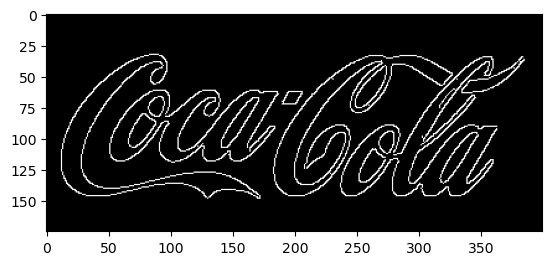

In [2]:
template = cv.imread('template/pattern.png',0)
template = cv.Canny(template, 50, 200)

plt.figure()
plt.imshow(template, cmap='gray')
plt.show()

In [3]:
images = [file for file in os.listdir('images') if '.jpg' or '.png' in file] 

In [4]:
images_rgb = {}
images_gray = {}
idx = 1
for image in images:
    img = cv.imread(f'images/{image}')
    images_rgb[f'image_{idx}'] = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    images_gray[f'image_{idx}'] = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    idx += 1

# Punto 1

In [5]:
def edge_detect(img, min, max):
    img_edge = cv.Canny(img, min, max)
    return img_edge

In [6]:
def scales_pyramid(img, begin, end):
    print(f'Tamaño original: {img.shape}')
    img_to_scale = img.copy()
    scales = np.linspace(begin, end, 5)
    resized_imgs = list()

    # se genera la piramide
    print(f'Dimensiones generadas:')
    for scale in scales:
        resized_imgs.append(cv.resize(img_to_scale, None, fx=scale, fy=scale))
        print(resized_imgs[-1].shape)

    return resized_imgs

In [7]:
def detection(image_rgb, image_resized, template, method='cv.TM_CCOEFF_NORMED'):
    
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    min_val, max_val, min_loc, top_left = cv.minMaxLoc(result)
    
    print(f"Confidence {max_val}") 

    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img_out, top_left, bottom_right, 0, 15)
    
    plt.subplot(121), plt.imshow(result, cmap = 'gray')
    plt.title('Matching')
    
    plt.subplot(122),plt.imshow(img_out)
    plt.title('Detection')
    
    img_out = cv.cvtColor(img_out,cv.COLOR_BGR2RGB)
    
    plt.show()

In [8]:
images_resized = {}

Tamaño original: (1389, 1389)
Dimensiones generadas:
(431, 431)
(438, 438)
(444, 444)
(451, 451)
(458, 458)


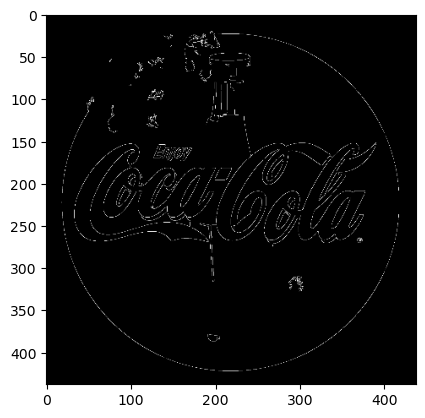

Confidence 0.10117781162261963


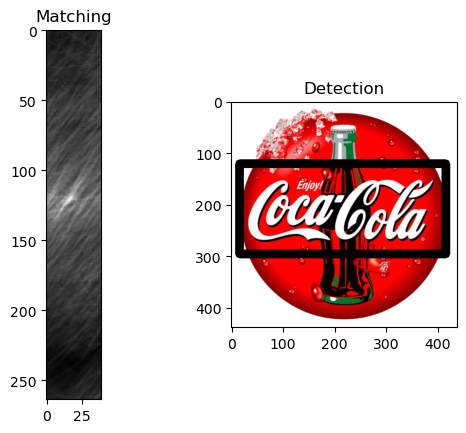

In [9]:
image_proc_1 = scales_pyramid(edge_detect(images_gray['image_1'],250,1000), 0.31, 0.33)
images_resized['image_1'] = image_proc_1[1]
plt.imshow(image_proc_1[1], cmap='gray')
plt.show()
h_resized = images_resized['image_1'].shape[1]
w_resized = images_resized['image_1'].shape[0]
detection(images_rgb[f'image_1'], images_resized[f'image_1'], template, method='cv.TM_CCOEFF_NORMED')

Tamaño original: (598, 799)
Dimensiones generadas:
(2392, 3196)
(2990, 3995)
(3588, 4794)
(4186, 5593)
(4784, 6392)


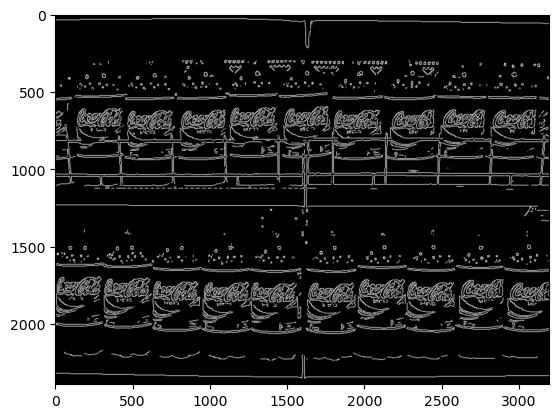

Confidence 0.17359864711761475


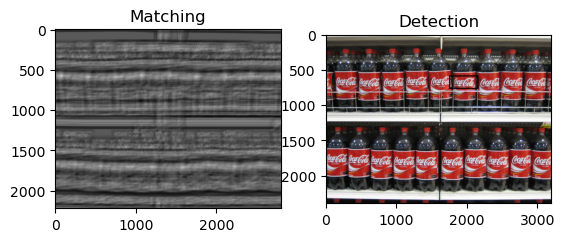

In [10]:
image_proc_2 = scales_pyramid(edge_detect(images_gray['image_2'],300,400), 4.0, 8.0)
images_resized['image_2'] = image_proc_2[0]
plt.imshow(image_proc_2[0], cmap='gray')
plt.show()
detection(images_rgb[f'image_2'], images_resized[f'image_2'], template, method='cv.TM_CCOEFF_NORMED')

Tamaño original: (500, 207)
Dimensiones generadas:
(750, 310)
(875, 362)
(1000, 414)
(1125, 466)
(1250, 518)


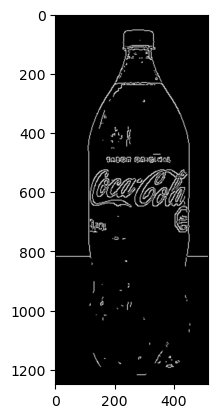

Confidence 0.1723739206790924


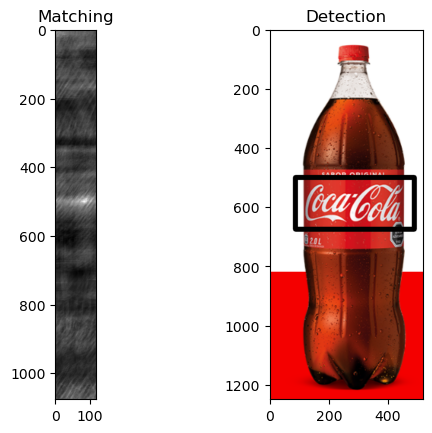

In [11]:
image_proc_3 = scales_pyramid(edge_detect(images_gray['image_3'], 250, 300), 1.5, 2.5)
images_resized['image_3'] = image_proc_3[4]
plt.imshow(image_proc_3[4], cmap='gray')
plt.show()
detection(images_rgb[f'image_3'], images_resized[f'image_3'], template, method='cv.TM_CCOEFF_NORMED')

Tamaño original: (493, 715)
Dimensiones generadas:
(246, 358)
(370, 536)
(493, 715)
(616, 894)
(740, 1072)


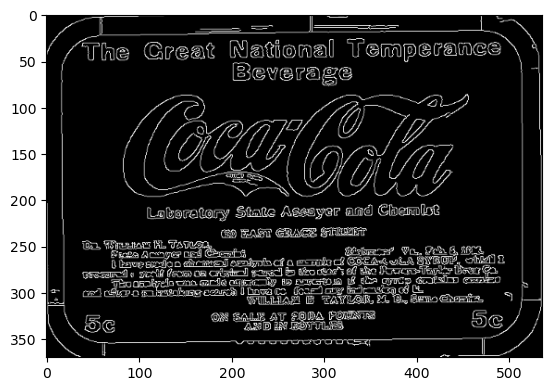

Confidence 0.10669964551925659


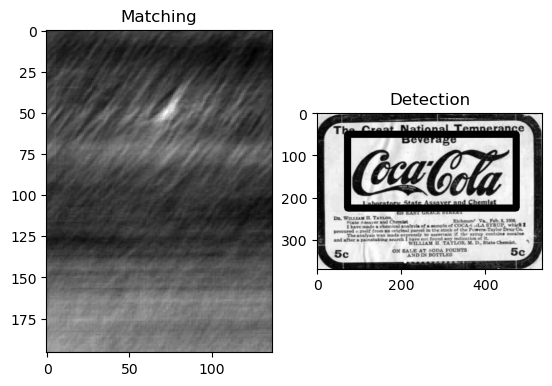

In [12]:
image_proc_4 = scales_pyramid(edge_detect(images_gray['image_4'], 200, 400), 0.5, 1.5)
images_resized['image_4'] = image_proc_4[1]
plt.imshow(image_proc_4[1], cmap='gray')
plt.show()
detection(images_rgb[f'image_4'], images_resized[f'image_4'], template, method='cv.TM_CCOEFF_NORMED')

Tamaño original: (450, 687)
Dimensiones generadas:
(315, 481)
(439, 670)
(562, 859)
(686, 1048)
(810, 1237)


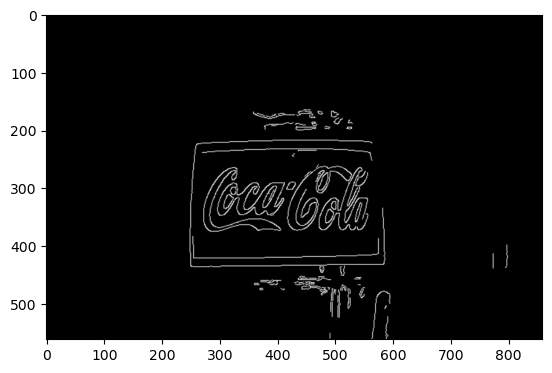

Confidence 0.1210063099861145


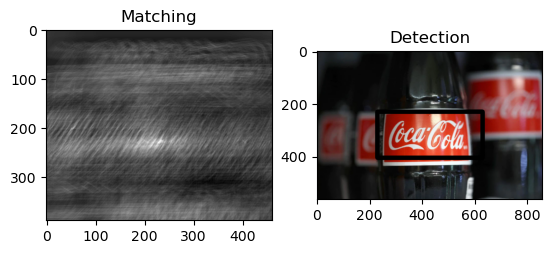

In [13]:
image_proc_5 = scales_pyramid(edge_detect(images_gray['image_5'],200,300), 0.7, 1.8)
images_resized['image_5'] = image_proc_5[2]
plt.imshow(image_proc_5[2], cmap='gray')
plt.show()
detection(images_rgb[f'image_5'], images_resized[f'image_5'], template, method='cv.TM_CCOEFF_NORMED')

Tamaño original: (363, 233)
Dimensiones generadas:
(617, 396)
(644, 414)
(672, 431)
(699, 449)
(726, 466)


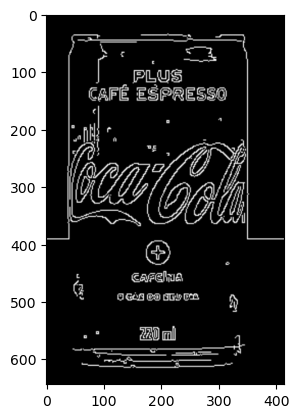

Confidence 0.10753105580806732


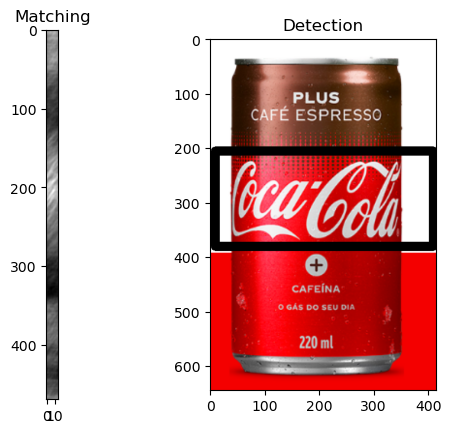

In [14]:
image_proc_6 = scales_pyramid(edge_detect(images_gray['image_6'], 150, 250), 1.7, 2.0)
images_resized['image_6'] = image_proc_6[1]
plt.imshow(image_proc_6[1], cmap='gray')
plt.show()
detection(images_rgb[f'image_6'], images_resized[f'image_6'], template, method='cv.TM_CCOEFF_NORMED')

# Punto 2

In [15]:
def detection_multi(image_rgb, image_resized, template, threshold, method='cv.TM_CCOEFF_NORMED'):
    
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    
    loc = np.where( result >= threshold)
    
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_out, pt, (pt[0] + w, pt[1] + h), (0), 10)
        
    plt.imshow(img_out,cmap = 'gray')

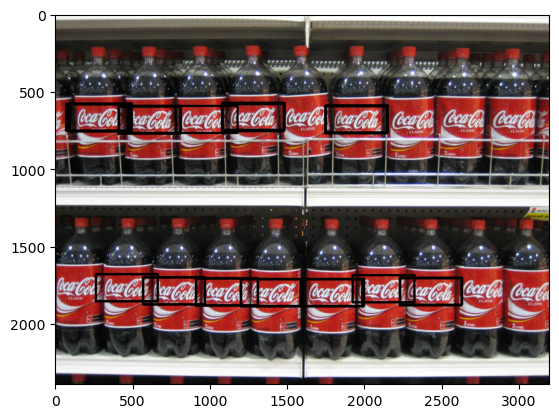

In [16]:
detection_multi(images_rgb[f'image_2'], images_resized[f'image_2'], template, 0.12, method='cv.TM_CCOEFF_NORMED')

# Punto 3

In [17]:
def detection_generalize(image_rgb, image_resized, template, threshold, method='cv.TM_CCOEFF_NORMED'):
    
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    
    loc = np.where( result >= threshold)
    
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_out, pt, (pt[0] + w, pt[1] + h), (0), 15)        
      
    plt.subplot(121), plt.imshow(result, cmap = 'gray')
    plt.title('Matching')
    
    plt.subplot(122),plt.imshow(img_out)
    plt.title('Detection')
    plt.show()

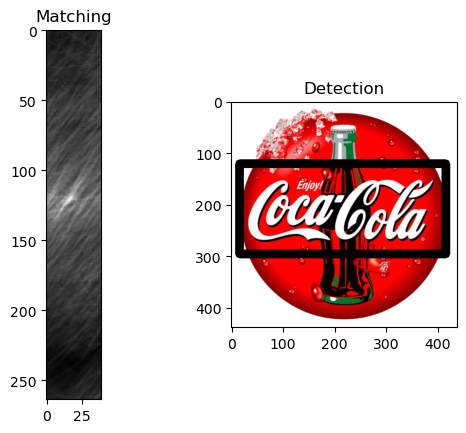

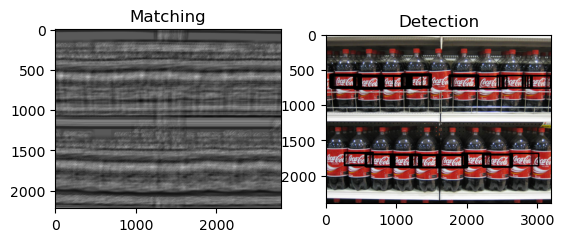

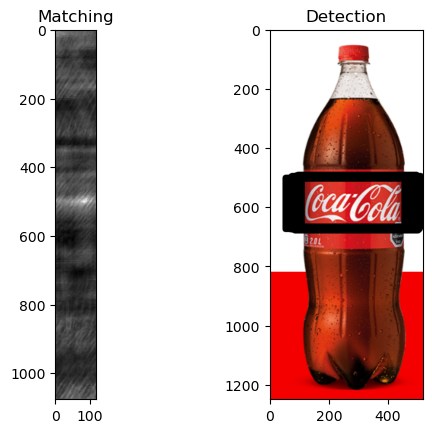

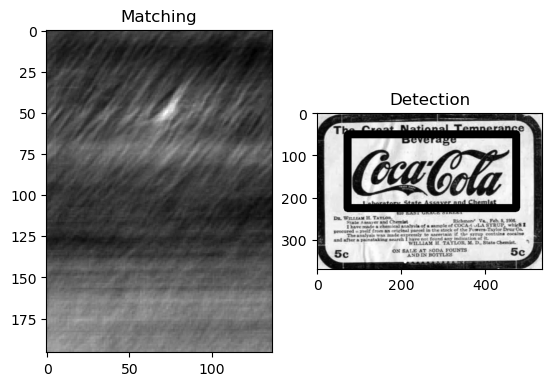

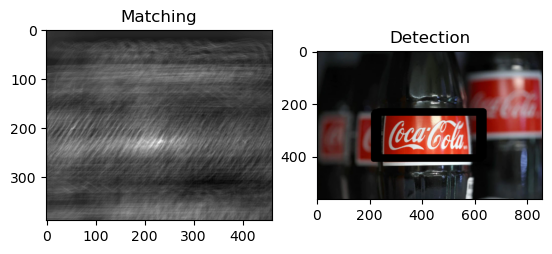

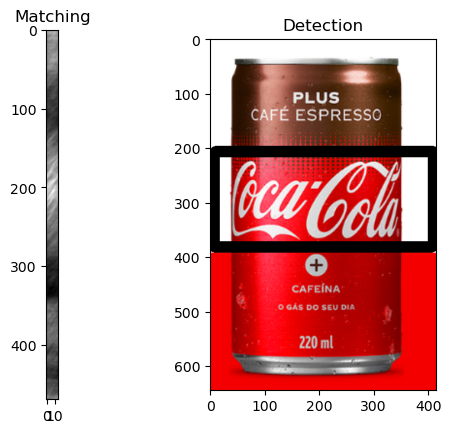

In [18]:
for k in images_resized.keys():
    detection_generalize(images_rgb[k], images_resized[k], template, 0.1, method='cv.TM_CCOEFF_NORMED')